This tutorial shows some plotting functionality of various common python packages. More in-depth tutorials exist:
    
* [pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [seaborn](https://seaborn.pydata.org/index.html)
* [plotnine](http://plotnine.readthedocs.io/en/stable)

In [1]:
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_table = pandas.read_csv("counts_table.tsv", sep="\t")

In [3]:
raw_table.head()

,Geneid,Chr,Start,End,Strand,Length,Aligned.sortedByCoord.out.bam,STAR_ERR1755082Aligned.sortedByCoord.out.bam,ERR1755084_STAR.bam,ERR1755086,ERR1755087Aligned.sortedByCoord.out.bam
0,ENSMUSG00000090025,1,3054233,3054733,+,501,0,0,0,0,0
1,ENSMUSG00000064842,1,3102016,3102125,+,110,0,0,0,0,0
2,ENSMUSG00000051951,1;1;1,3205901;3206523;3214482,3216344;3215632;3671498,-;-;-,465598,13,8,8,6,10
3,ENSMUSG00000089699,1,3466587,3513553,+,46967,0,0,0,0,0
4,ENSMUSG00000088333,1,3783876,3783933,-,58,0,0,0,0,0


In [4]:
raw_table["Strand"] = raw_table.Strand.str[0]
display(raw_table.head())
len(raw_table)

,Geneid,Chr,Start,End,Strand,Length,Aligned.sortedByCoord.out.bam,STAR_ERR1755082Aligned.sortedByCoord.out.bam,ERR1755084_STAR.bam,ERR1755086,ERR1755087Aligned.sortedByCoord.out.bam
0,ENSMUSG00000090025,1,3054233,3054733,+,501,0,0,0,0,0
1,ENSMUSG00000064842,1,3102016,3102125,+,110,0,0,0,0,0
2,ENSMUSG00000051951,1;1;1,3205901;3206523;3214482,3216344;3215632;3671498,-,465598,13,8,8,6,10
3,ENSMUSG00000089699,1,3466587,3513553,+,46967,0,0,0,0,0
4,ENSMUSG00000088333,1,3783876,3783933,-,58,0,0,0,0,0


39179

In [5]:
gene_table = raw_table.drop(["Chr", "Start", "End", "Strand", "Length"], axis=1).set_index("Geneid")
gene_table.head()

,Aligned.sortedByCoord.out.bam,STAR_ERR1755082Aligned.sortedByCoord.out.bam,ERR1755084_STAR.bam,ERR1755086,ERR1755087Aligned.sortedByCoord.out.bam
Geneid,,,,,
ENSMUSG00000090025,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,0
ENSMUSG00000051951,13,8,8,6,10
ENSMUSG00000089699,0,0,0,0,0
ENSMUSG00000088333,0,0,0,0,0


In [6]:
gene_table = gene_table.replace(0, numpy.nan).dropna(how="all", axis=0)

# Pandas plotting

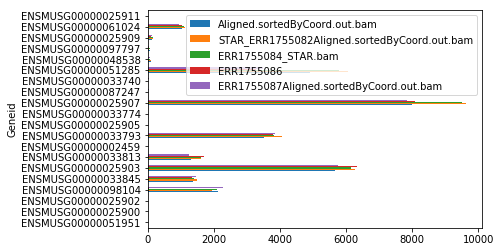

In [7]:
gene_table.head(20).plot(kind="barh")

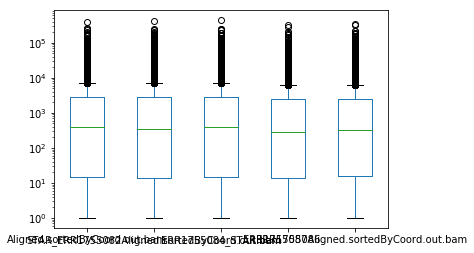

In [8]:
gene_table.plot(kind="box",logy=True)

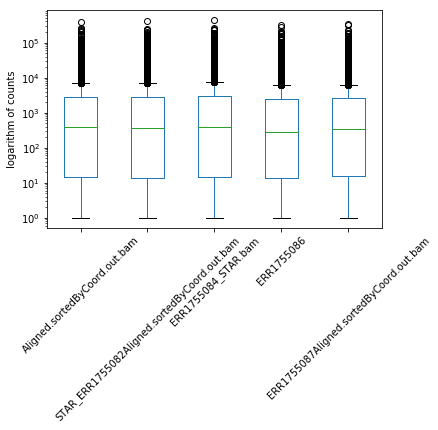

In [9]:
ax = gene_table.plot(kind="box", logy=True)
ax.set_ylabel("logarithm of counts")
ax.xaxis.set_tick_params(rotation=45)

# Seaborn plotting

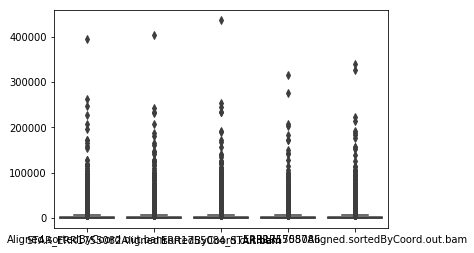

In [10]:
seaborn.boxplot(data=gene_table)

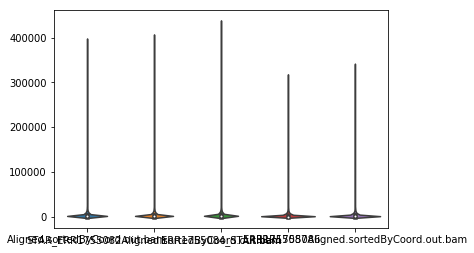

In [11]:
seaborn.violinplot(data=gene_table)

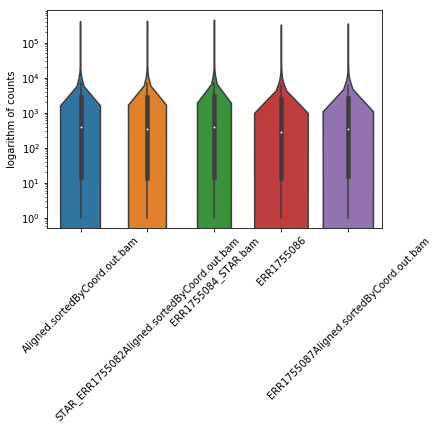

In [12]:
ax = seaborn.violinplot(data=gene_table)
ax.set_ylabel("logarithm of counts")
ax.set_yscale("log")
ax.xaxis.set_tick_params(rotation=45)

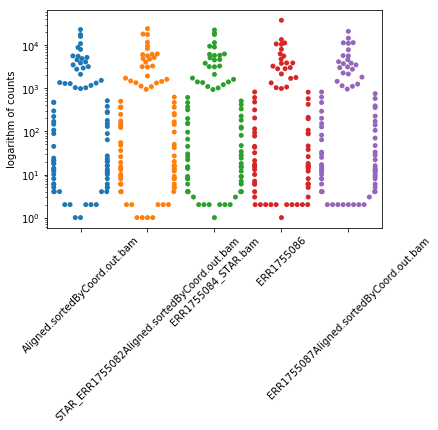

In [13]:
ax = seaborn.swarmplot(data=gene_table.head(100))
ax.set_ylabel("logarithm of counts")
ax.set_yscale("log")
ax.xaxis.set_tick_params(rotation=45)

In [14]:
gene_table.reset_index().melt(id_vars='Geneid', var_name='sample', value_name='counts').head()

,Geneid,sample,counts
0,ENSMUSG00000051951,Aligned.sortedByCoord.out.bam,13.0
1,ENSMUSG00000025900,Aligned.sortedByCoord.out.bam,2.0
2,ENSMUSG00000025902,Aligned.sortedByCoord.out.bam,NaN
3,ENSMUSG00000098104,Aligned.sortedByCoord.out.bam,2115.0
4,ENSMUSG00000033845,Aligned.sortedByCoord.out.bam,1362.0


In [15]:
melted_table = gene_table.melt(var_name="sample", value_name="counts")
melted_table.head()

,sample,counts
0,Aligned.sortedByCoord.out.bam,13.0
1,Aligned.sortedByCoord.out.bam,2.0
2,Aligned.sortedByCoord.out.bam,NaN
3,Aligned.sortedByCoord.out.bam,2115.0
4,Aligned.sortedByCoord.out.bam,1362.0


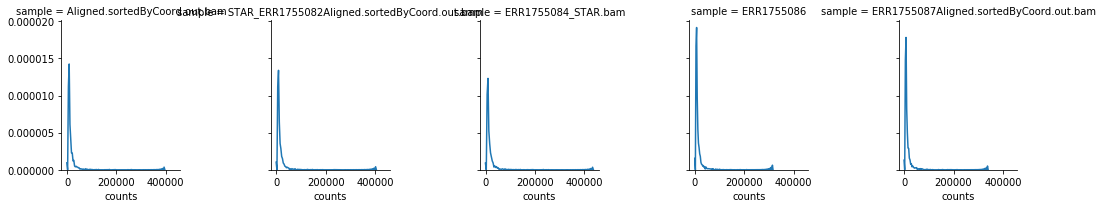

In [16]:
g = seaborn.FacetGrid(melted_table, col="sample")
g.map(seaborn.kdeplot, "counts")

In [17]:
melted_table_with_strand = raw_table.drop(["Chr", "Start", "End", "Length"], axis=1).melt(
    id_vars=["Geneid", "Strand"], var_name="sample", value_name="counts")
melted_table_with_strand.head()

,Geneid,Strand,sample,counts
0,ENSMUSG00000090025,+,Aligned.sortedByCoord.out.bam,0
1,ENSMUSG00000064842,+,Aligned.sortedByCoord.out.bam,0
2,ENSMUSG00000051951,-,Aligned.sortedByCoord.out.bam,13
3,ENSMUSG00000089699,+,Aligned.sortedByCoord.out.bam,0
4,ENSMUSG00000088333,-,Aligned.sortedByCoord.out.bam,0


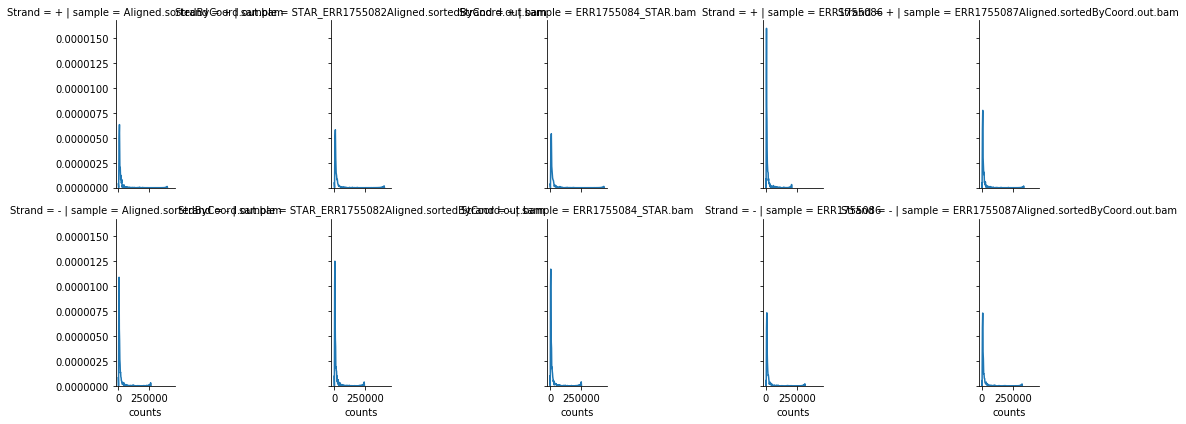

In [18]:
g = seaborn.FacetGrid(melted_table_with_strand, col="sample", row="Strand")
g.map(seaborn.kdeplot, "counts")

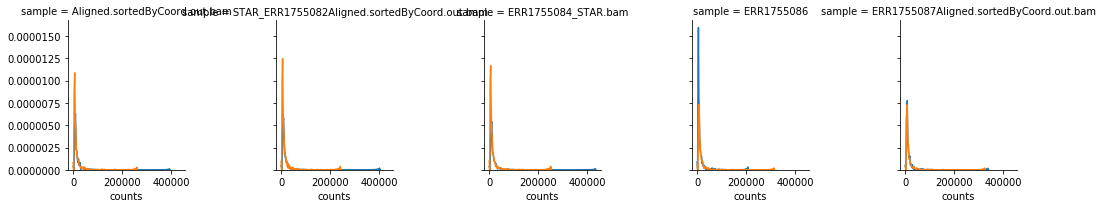

In [19]:
g = seaborn.FacetGrid(melted_table_with_strand, col="sample", hue="Strand")
g.map(seaborn.kdeplot, "counts")

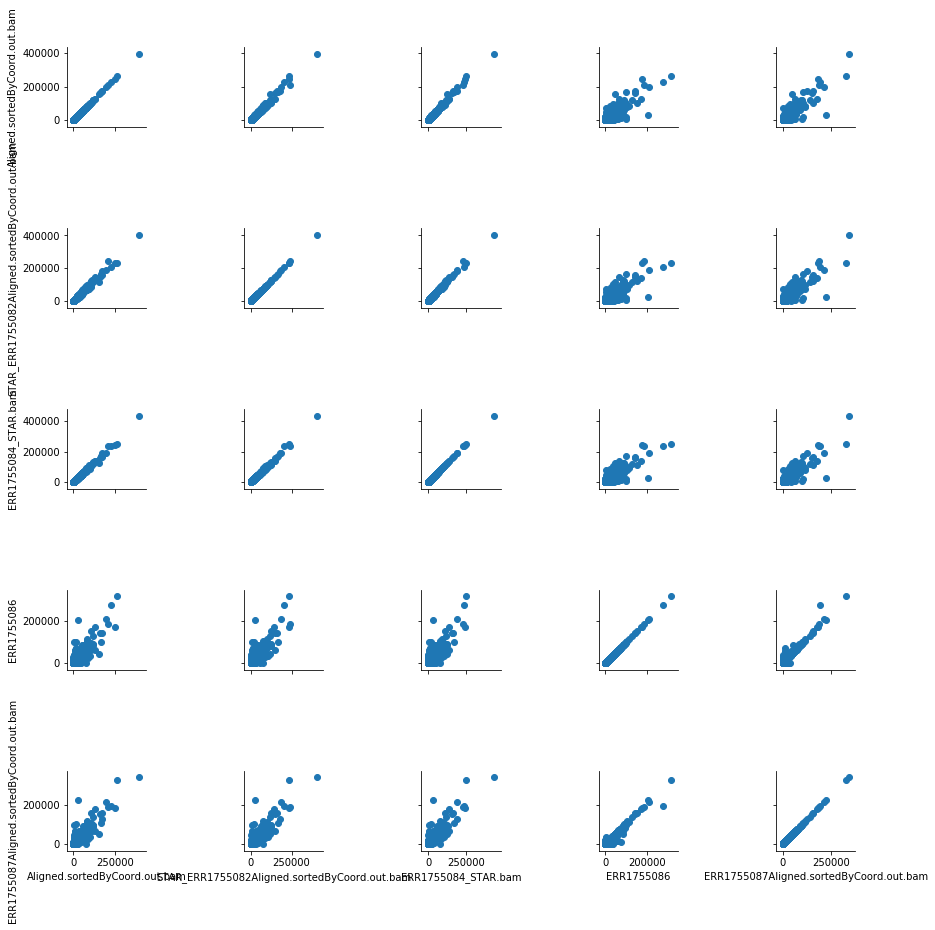

In [20]:
g = seaborn.PairGrid(gene_table)
g = g.map(plt.scatter)

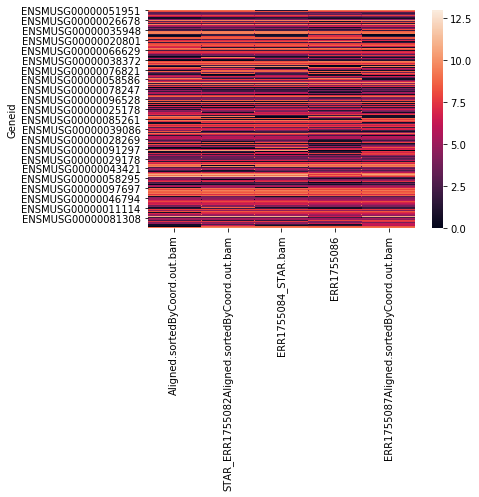

In [21]:
seaborn.heatmap(numpy.log(gene_table))

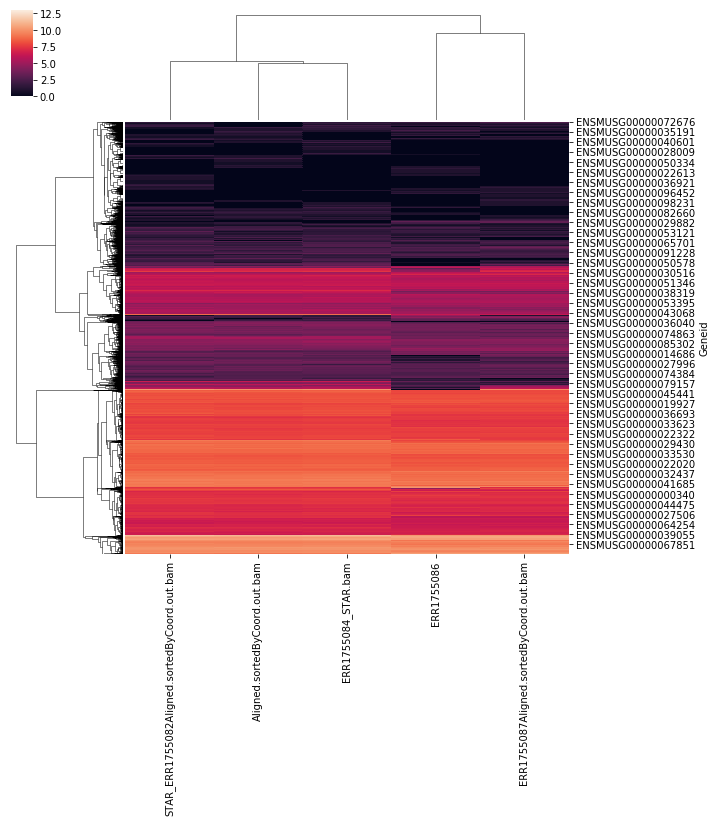

In [22]:
seaborn.clustermap(numpy.log(gene_table.fillna(0) + 1))

# ggplot like plotting

In [23]:
from plotnine import *

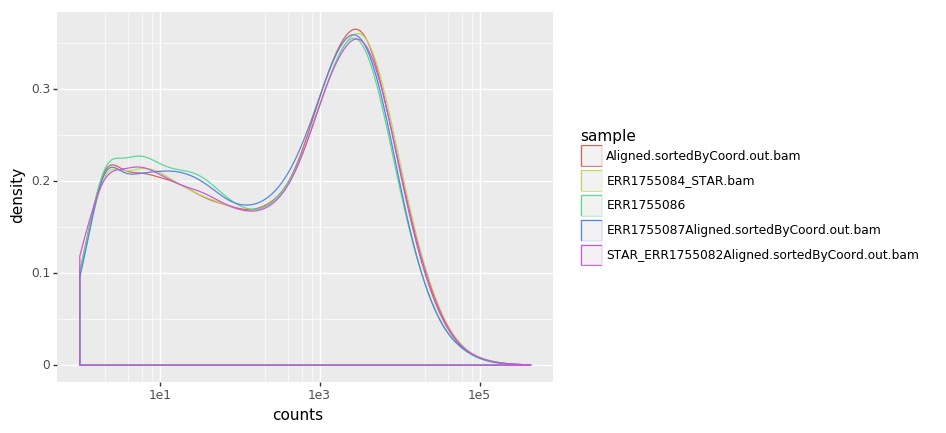

<ggplot: (7560982592)>

In [24]:
ggplot(melted_table, aes(x="counts", color="sample")) + scale_x_log10() + geom_density()

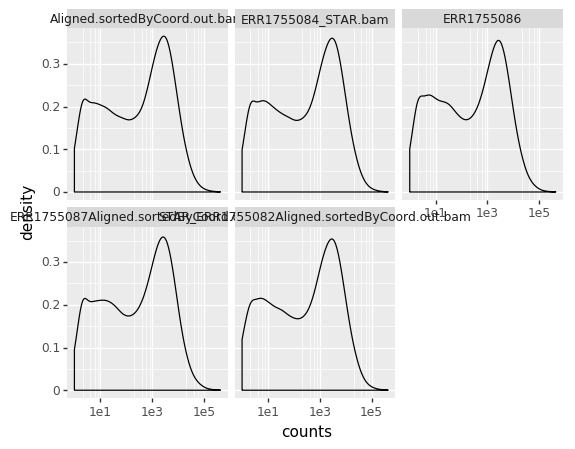

<ggplot: (-9223372029293171119)>

In [25]:
ggplot(melted_table, aes(x="counts")) + scale_x_log10() + geom_density() + facet_wrap("sample") 

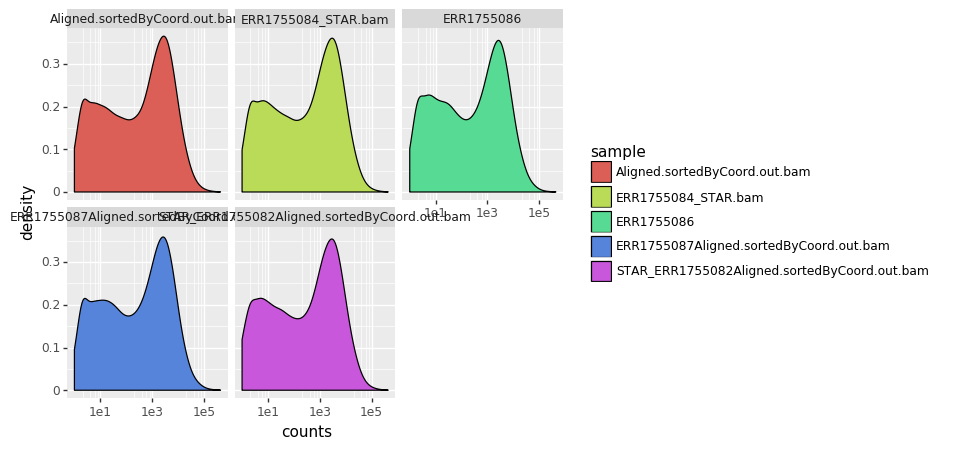

<ggplot: (-9223372029832559293)>

In [26]:
ggplot(melted_table, aes(x="counts", fill="sample")) + scale_x_log10() + geom_density() + facet_wrap("sample") 